In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Top games viewed and streamed on Twitch

Let's find the top 10 games on Twitch and plot the evolution of view time and stream time during the covid period of 2019 to 2021.

We start by loading the dataset, select the time period that we want to analyse and format the Date and Hours_Streamed columns.

In [2]:
twitch_global = pd.read_csv("data/Twitch_game_data.csv", encoding='cp1252')
twitch_global = twitch_global[twitch_global['Year']>=2019]
twitch_global['Date'] = pd.to_datetime(twitch_global[['Year', 'Month']].assign(DAY=1))
twitch_global['Hours_Streamed'] = twitch_global['Hours_Streamed'].str.extract(r'(\d+)').apply(pd.to_numeric)
twitch_global.head()

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,Date
7200,1,Fortnite,1,2019,126502656,10205058,649136,56274,1013016,170259,13734,12.40,2019-01-01
7201,2,League of Legends,1,2019,98976171,2245379,400257,6079,197058,133211,3022,44.08,2019-01-01
7202,3,Just Chatting,1,2019,59064487,803672,184542,1757,134201,79494,1081,73.49,2019-01-01
7203,4,Dota 2,1,2019,46512393,546394,444825,1462,42722,62600,735,85.13,2019-01-01
7204,5,Counter-Strike: Global Offensive,1,2019,30778297,1051447,187678,2895,159310,41424,1415,29.27,2019-01-01


Let's reduce this dataset to contain only games that appear in all time periods.

In [3]:
unique_games = twitch_global[twitch_global.groupby('Game')['Date'].transform('nunique') == twitch_global['Date'].nunique()]
unique_games

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,Date
7200,1,Fortnite,1,2019,126502656,10205058,649136,56274,1013016,170259,13734,12.40,2019-01-01
7201,2,League of Legends,1,2019,98976171,2245379,400257,6079,197058,133211,3022,44.08,2019-01-01
7202,3,Just Chatting,1,2019,59064487,803672,184542,1757,134201,79494,1081,73.49,2019-01-01
7203,4,Dota 2,1,2019,46512393,546394,444825,1462,42722,62600,735,85.13,2019-01-01
7204,5,Counter-Strike: Global Offensive,1,2019,30778297,1051447,187678,2895,159310,41424,1415,29.27,2019-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14346,147,Paladins,12,2021,1019903,66205,2805,172,8019,1372,89,15.41,2021-12-01
14351,152,PUBG Mobile,12,2021,952764,93160,29762,234,5866,1282,125,10.23,2021-12-01
14358,159,Science & Technology,12,2021,887109,71221,57155,160,3611,1193,95,12.46,2021-12-01
14369,170,Yu-Gi-Oh! Duel Links,12,2021,804649,20441,6349,57,1967,1082,27,39.36,2021-12-01


Now, we find the top 10 most viewed games on the platform.

In [4]:
top_games = unique_games.groupby('Game')['Hours_watched'].sum().sort_values(ascending=False)[:10].keys()
top_games

Index(['Just Chatting', 'League of Legends', 'Grand Theft Auto V', 'Fortnite',
       'Counter-Strike: Global Offensive', 'Dota 2', 'Minecraft',
       'World of Warcraft', 'Hearthstone', 'Dead by Daylight'],
      dtype='object', name='Game')

We now create the dataframe that we will analyse which only contains those top 10 games.

In [5]:
df = unique_games[unique_games['Game'].isin(top_games)]
df

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,Date
7200,1,Fortnite,1,2019,126502656,10205058,649136,56274,1013016,170259,13734,12.40,2019-01-01
7201,2,League of Legends,1,2019,98976171,2245379,400257,6079,197058,133211,3022,44.08,2019-01-01
7202,3,Just Chatting,1,2019,59064487,803672,184542,1757,134201,79494,1081,73.49,2019-01-01
7203,4,Dota 2,1,2019,46512393,546394,444825,1462,42722,62600,735,85.13,2019-01-01
7204,5,Counter-Strike: Global Offensive,1,2019,30778297,1051447,187678,2895,159310,41424,1415,29.27,2019-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14209,10,Counter-Strike: Global Offensive,12,2021,45401155,914766,524450,2485,94162,61105,1231,49.63,2021-12-01
14210,11,Dota 2,12,2021,43235580,714724,210062,1759,35356,58190,961,60.49,2021-12-01
14214,15,World of Warcraft,12,2021,22373247,777745,76285,3177,38289,30112,1046,28.77,2021-12-01
14216,17,Dead by Daylight,12,2021,22054352,1460164,110737,3607,120934,29682,1965,15.10,2021-12-01


Let's plot the total number of hours watched for each of those games.

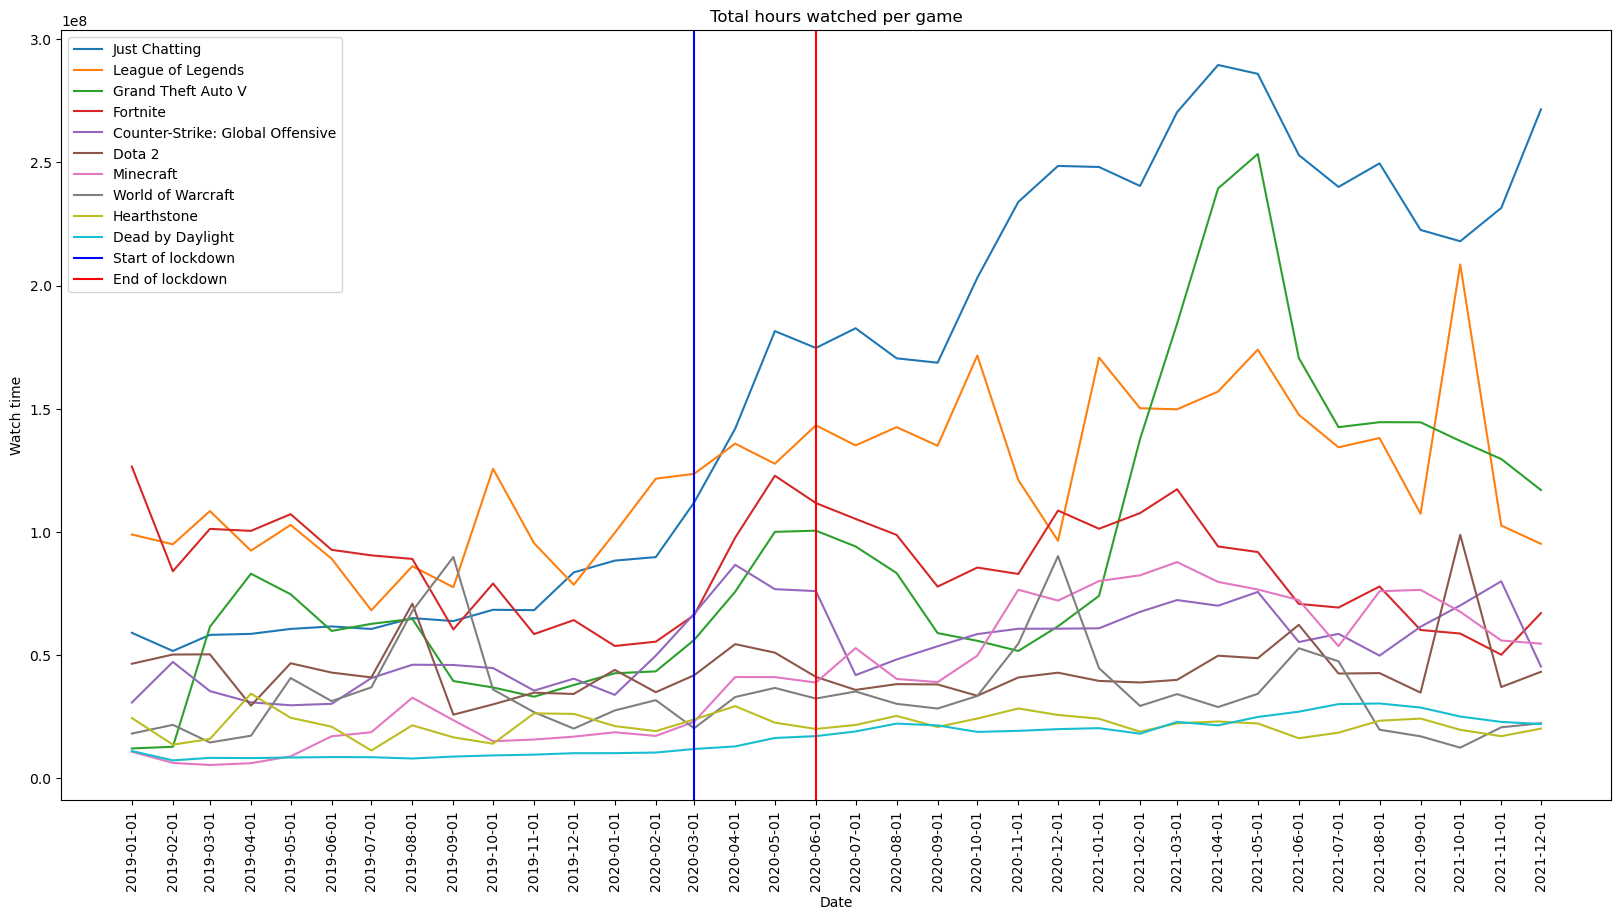

In [6]:
plt.figure(figsize=(20,10))
plot_df = df[['Date', 'Hours_watched', 'Game']]
date = plot_df['Date'].dt.date.unique()
for game in top_games:
    game_df = plot_df[plot_df['Game'] == game]
    plt.plot(date, game_df['Hours_watched'], label=game)
plt.xticks(date, rotation='vertical')
plt.axvline(x = pd.to_datetime("03/01/2020"), color = 'b', label = 'Start of lockdown')
plt.axvline(x = pd.to_datetime("06/01/2020"), color = 'r', label = 'End of lockdown')
plt.title('Total hours watched per game')
plt.xlabel('Date')
plt.ylabel('Watch time')
plt.legend()
plt.show()

Let's plot the total number of hours streamed for each of those games.

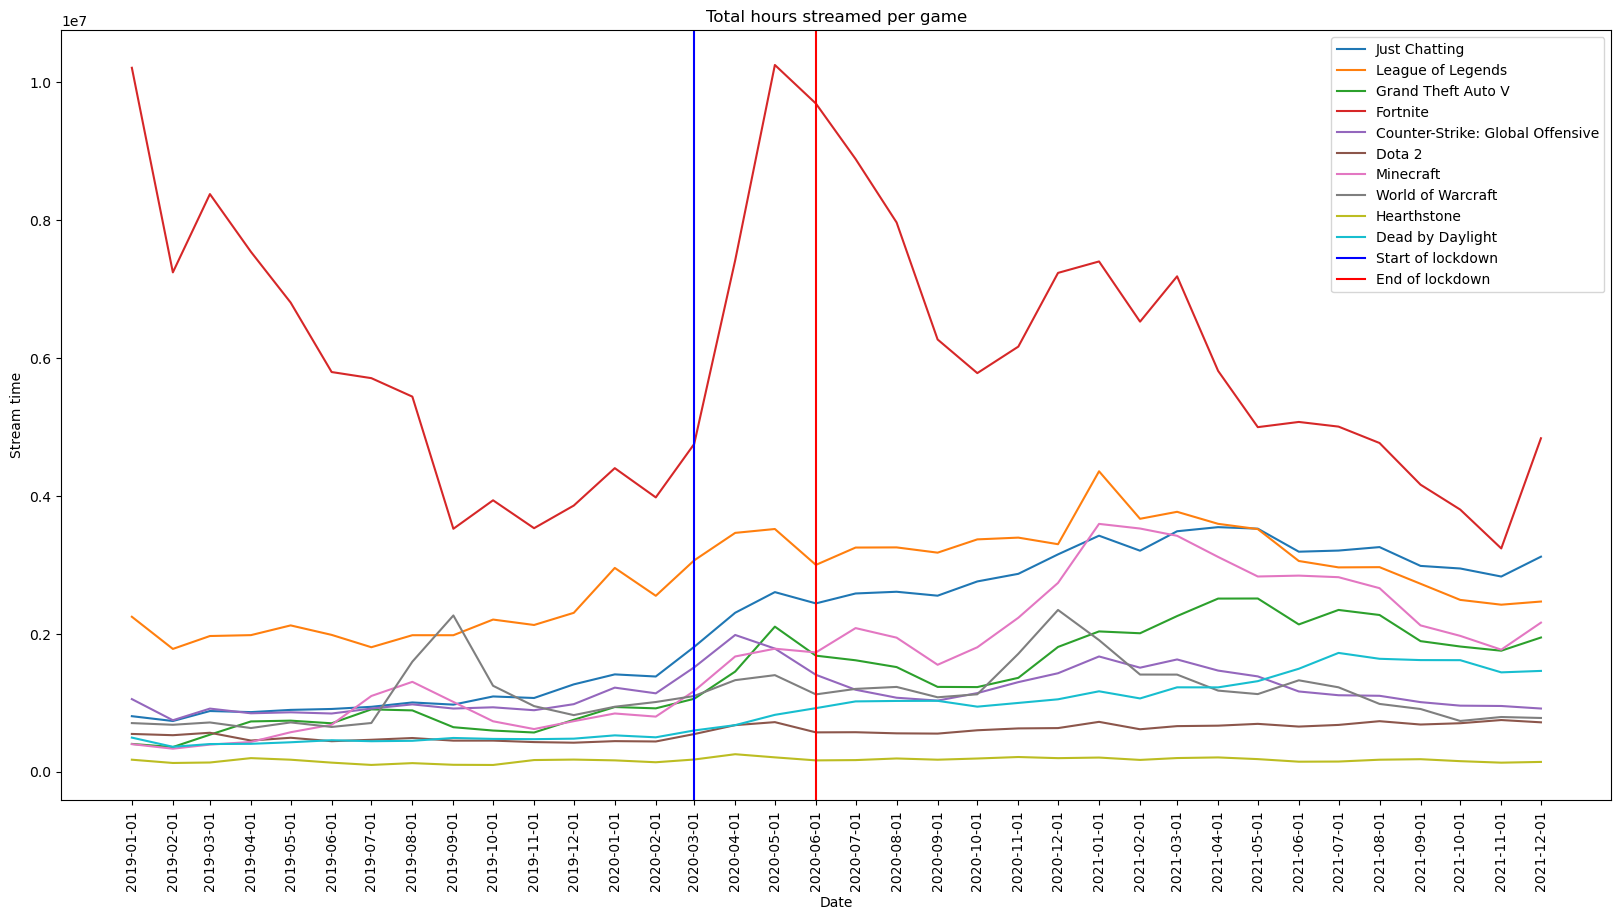

In [7]:
plt.figure(figsize=(20,10))
plot_df = df[['Date', 'Hours_Streamed', 'Game']]
date = plot_df['Date'].dt.date.unique()
for game in top_games:
    game_df = plot_df[plot_df['Game'] == game]
    plt.plot(date, game_df['Hours_Streamed'], label=game)
plt.xticks(date, rotation='vertical')
plt.axvline(x = pd.to_datetime("03/01/2020"), color = 'b', label = 'Start of lockdown')
plt.axvline(x = pd.to_datetime("06/01/2020"), color = 'r', label = 'End of lockdown')
plt.title('Total hours streamed per game')
plt.xlabel('Date')
plt.ylabel('Stream time')
plt.legend()
plt.show()